# Coursework Computer Vision:

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

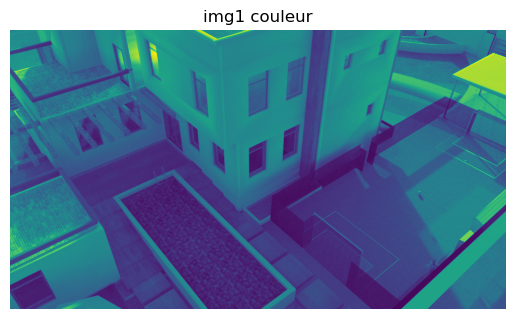

In [437]:
img_cou = cv2.imread('Frame1.png', 0)

plt.title('img1 couleur')
plt.imshow(img_cou)
plt.axis('off')
plt.show()

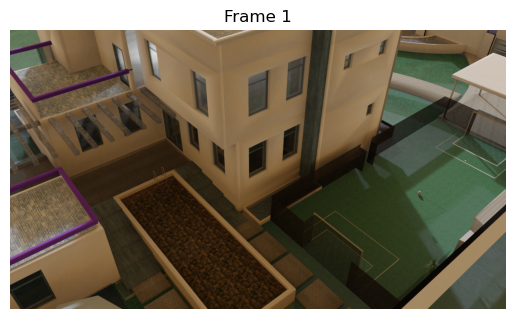

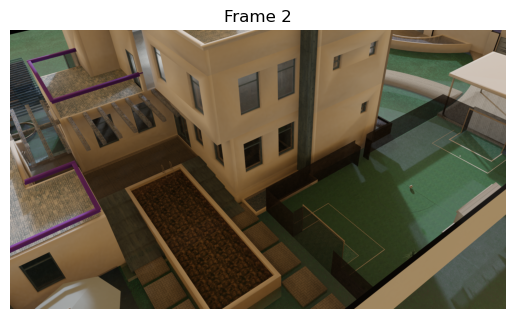

In [157]:
frame1 = cv2.imread('Frame1.png')
frame2 = cv2.imread('Frame2.png')

plt.title('Frame 1')
plt.imshow(frame1, cmap = 'gray')
plt.axis('off')
plt.show()

plt.title('Frame 2')
plt.imshow(frame2, cmap = 'gray')
plt.axis('off')
plt.show()

## Salient feature detection:

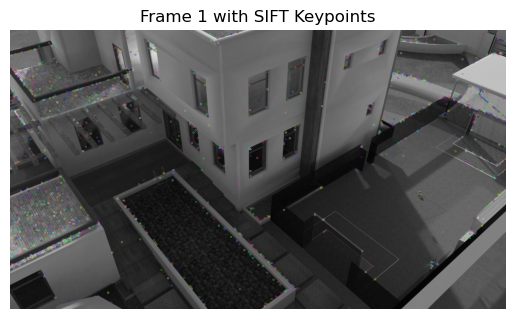

In [142]:
image1_detection = cv2.imread('Frame1.png', cv2.IMREAD_GRAYSCALE)
#image1_detection = cv2.imread('Frame1.png')

# Convert the image to grayscale
#gray_image1 = cv2.cvtColor(image1_detection, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray_image1, None)
#keypoints1, descriptors1 = sift.detectAndCompute(image1_detection, None)

# Draw keypoints on the image
#keypoint_image1 = cv2.drawKeypoints(gray_image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#keypoint_image1 = cv2.drawKeypoints(image1_detection, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoint_image1 = cv2.drawKeypoints(image1_detection, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)


# Convert BGR to RGB for matplotlib
keypoint_image_rgb1 = cv2.cvtColor(keypoint_image1, cv2.COLOR_BGR2RGB)


# Display the image with keypoints
plt.imshow(keypoint_image_rgb1)
plt.axis('off')  # Do not display axis
plt.title('Frame 1 with SIFT Keypoints')
plt.show()


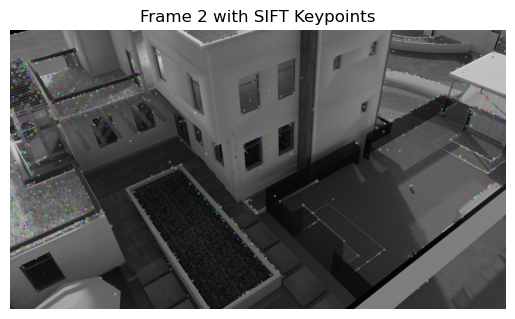

In [143]:
image2_detection = cv2.imread('Frame2.png',cv2.IMREAD_GRAYSCALE)
#image2_detection = cv2.imread('Frame2.png')


# Convert the image to grayscale
#gray_image2 = cv2.cvtColor(image2_detection, cv2.COLOR_BGR2GRAY)

# Initialize the SIFT detector
#sift = cv2.SIFT_create()

# Detect keypoints and descriptors
#keypoints2, descriptors2 = sift.detectAndCompute(gray_image2, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2_detection, None)


# Draw keypoints on the image
#keypoint_image2 = cv2.drawKeypoints(gray_image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#keypoint_image2 = cv2.drawKeypoints(image2_detection, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
keypoint_image2 = cv2.drawKeypoints(image2_detection, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)


# Convert BGR to RGB for matplotlib
keypoint_image_rgb2 = cv2.cvtColor(keypoint_image2, cv2.COLOR_BGR2RGB)


# Display the image with keypoints
plt.imshow(keypoint_image_rgb2)
plt.axis('off')  # Do not display axis
plt.title('Frame 2 with SIFT Keypoints')
plt.show()

## Matching salient feature

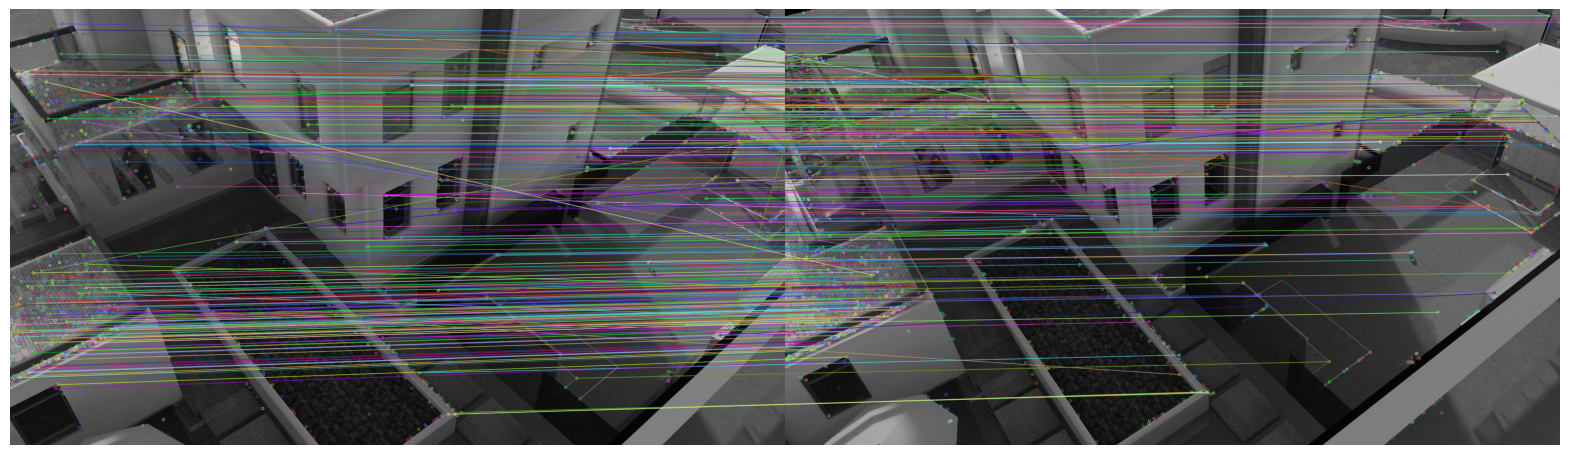

In [144]:
# Create a BFMatcher object with default params
bf = cv2.BFMatcher()

# Match descriptors using KNN method
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Apply ratio test to find good matches
good_matches = []
ratio_threshold = 0.7  # Common ratio threshold. Lower means more strict.
for m, n in matches:
    if m.distance < ratio_threshold * n.distance:
        good_matches.append(m)

# Sort the matches based on the distance
good_matches = sorted(good_matches, key=lambda x: x.distance)

# Draw the matches
#matched_img = cv2.drawMatches(gray_image1, keypoints1, gray_image2, keypoints2, good_matches, None)
matched_img = cv2.drawMatches(image1_detection, keypoints1, image2_detection, keypoints2, good_matches, None)


plt.figure(figsize = (20,14))
# Display the matched image
plt.axis('off')  # Do not display axis

plt.imshow(matched_img)
plt.show()

In [11]:
def rectify_images(image1, image2, intrinsic1, dist1, intrinsic2, dist2, R, T):
    size = image1.shape[:2]  # Assuming both images are the same size

    R1, R2, P1, P2, Q, validPixROI1, validPixROI2 = cv2.stereoRectify(
        cameraMatrix1=intrinsic1, distCoeffs1=dist1,
        cameraMatrix2=intrinsic2, distCoeffs2=dist2,
        imageSize=size, R=R, T=T, flags=cv2.CALIB_ZERO_DISPARITY, alpha=0
    )

    map1x, map1y = cv2.initUndistortRectifyMap(intrinsic1, dist1, R1, P1, size, cv2.CV_32FC1)
    map2x, map2y = cv2.initUndistortRectifyMap(intrinsic2, dist2, R2, P2, size, cv2.CV_32FC1)

    image1_rectified = cv2.remap(image1, map1x, map1y, cv2.INTER_LINEAR)
    image2_rectified = cv2.remap(image2, map2x, map2y, cv2.INTER_LINEAR)

    return image1_rectified, image2_rectified

In [8]:
# Camera 1 Parameters
intrinsic_matrix1 = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
                              [0.000e+00, 1.600e+03, 5.395e+02],
                              [0.000e+00, 0.000e+00, 1.000e+00]])
extrinsic_matrix1 = np.array([[-6.32422984e-01, -7.74574101e-01, 8.72639567e-03, -2.36433081e+00],
                              [-5.00836670e-01, 4.00276423e-01, -7.67425179e-01, -1.74806440e+00],
                              [ 5.90934694e-01, -4.89707828e-01, -6.41079128e-01, 2.59576015e+01],
                              [ 0., 0., 0., 1.]])
distortion1 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# Camera 2 Parameters
intrinsic_matrix2 = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
                              [0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
                              [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])
extrinsic_matrix2 = np.array([[-0.5845883, -0.81050003, -0.03669427, -2.39520617],
                              [-0.5041514, 0.39832053, -0.76627171, -1.79913743],
                              [ 0.6356793, -0.42945388, -0.64146805, 26.26804151],
                              [ 0., 0., 0., 1.]])
distortion2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# Transformation between Cameras
R = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
              [ 0.00362138, 0.99999203, -0.00174044], 
              [-0.07497205, 0.00200697, 0.99718366]])
T = np.array([-1.98989457, 0.00265269, 0.20979508])


# Rectify images
image1_rect, image2_rect = rectify_images(image1, image2, intrinsic_matrix1, distortion1, intrinsic_matrix2, distortion2, R, T)


NameError: name 'image1' is not defined

### F numerical

In [145]:
# Extract location of good matches
points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)



# Find fundamental matrix
#fundamental_matrix, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_8POINT)
fundamental_matrix, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_RANSAC)


In [146]:
fundamental_matrix

array([[-3.13315318e-08,  1.26388643e-06,  6.61865261e-05],
       [ 1.28707537e-07, -3.17216577e-08, -2.80642569e-02],
       [-6.14366267e-04,  2.48382916e-02,  1.00000000e+00]])

### F theoretical

In [131]:
K = np.array([[1.600e+03, 0.000e+00, 9.595e+02],
              [0.000e+00, 1.600e+03, 5.395e+02],
              [0.000e+00, 0.000e+00, 1.000e+00]])

In [132]:
K_prime = np.array([[1.49333333e+03, 0.00000000e+00, 9.78700000e+02],
                    [0.00000000e+00, 1.49333333e+03, 5.20300000e+02],
                    [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]) #K_2_Intr

In [133]:
R = np.array([[ 0.9971792 , -0.00348069, 0.07497863],
              [0.00362138, 0.99999203, -0.00174044],
              [-0.07497205, 0.00200697, 0.99718366]]) #R_vec

In [134]:
t = np.array([-1.98989457, 0.00265269, 0.20979508]) #T_vec

In [135]:
part_1 = K_prime @ t.reshape((-1,1))

# Given the pre-computed variables, here is the code to compute the fundamental matrix
cross = [
    [0, -part_1[2, 0], part_1[1, 0]],
    [part_1[2, 0], 0, -part_1[0, 0]],
    [-part_1[1, 0], part_1[0, 0], 0],
]

part_2 = K_prime @ R @ np.linalg.inv(K)

# Compute the theoretical fundamental matrix
theorical_fundamental = np.array(cross) @ part_2
theorical_fundamental

array([[-8.94716958e-04, -1.95802211e-01,  1.10989237e+02],
       [ 5.60156937e-02,  3.04586526e-03,  2.93130697e+03],
       [-4.19999288e+01, -2.58338899e+03, -1.17061260e+05]])

In [136]:
U, S, Vt = np.linalg.svd(theorical_fundamental)
# Make the smallest singular value equal to zero to enforce rank 2
S[2] = 0
# Reconstruct the fundamental matrix with the new singular values
normalized_fundamental = U @ np.diag(S) @ Vt
normalized_fundamental /= normalized_fundamental[2, 2]

In [137]:
normalized_fundamental

array([[ 7.64315161e-09,  1.67264739e-06, -9.48129529e-04],
       [-4.78516067e-07, -2.60194129e-08, -2.50407946e-02],
       [ 3.58785894e-04,  2.20686928e-02,  1.00000000e+00]])

### Epipolar constraints:

In [147]:
# Step 1: Find the points from the keypoints
pts1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches])

# We select only inlier points
pts1 = pts1[mask.ravel() == 1]
pts2 = pts2[mask.ravel() == 1]

In [148]:
def drawlines(img1, img2, lines, pts1, pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    #r, c, _ = img1.shape
    r, c= img1.shape
    img1color = cv2.cvtColor(img1, cv2.COLOR_GRAY2BGR)
    img2color = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)
    # Edit: use the same random seed so that two images are comparable!
    np.random.seed(0)
    for r, pt1, pt2 in zip(lines, pts1, pts2):
        color = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1] ])
        x1, y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        #img1 = cv2.line(img1, (x0, y0), (x1, y1), color, 1)
        #img1 = cv2.circle(img1, tuple(pt1), 5, color, -1)
        #img2 = cv2.circle(img2, tuple(pt2), 5, color, -1)

        # Convert float coordinates to integer for circles
        pt1_int = (int(pt1[0]), int(pt1[1]))
        pt2_int = (int(pt2[0]), int(pt2[1]))

        #img1 = cv2.circle(img1, pt1_int, 5, color, -1)
        #img2 = cv2.circle(img2, pt2_int, 5, color, -1)

        img1 = cv2.circle(img1color, pt1_int, 5, color, -1)
        img2 = cv2.circle(img2color, pt2_int, 5, color, -1)

    return img1, img2

In [14]:
def drawpoints(img, pts):
    ''' img - image on which we draw the points
        pts - points to be drawn '''
    for pt in pts:
        # Convert float coordinates to integer
        pt_int = (int(pt[0]), int(pt[1]))
        color = tuple(np.random.randint(0, 255, 3).tolist())
        img = cv2.circle(img, pt_int, 5, color, -1)
    return img


In [15]:
def drawpoints(img, pts, epilines):  # Set a small threshold
    """Draw points on the image that respect the epipolar constraints."""
    for pt, line in zip(pts, epilines):
        pt_int = (int(pt[0]), int(pt[1]))
        color = tuple(np.random.randint(0, 255, 3).tolist())
        img = cv2.circle(img, pt_int, 5, color, -1)
    return img

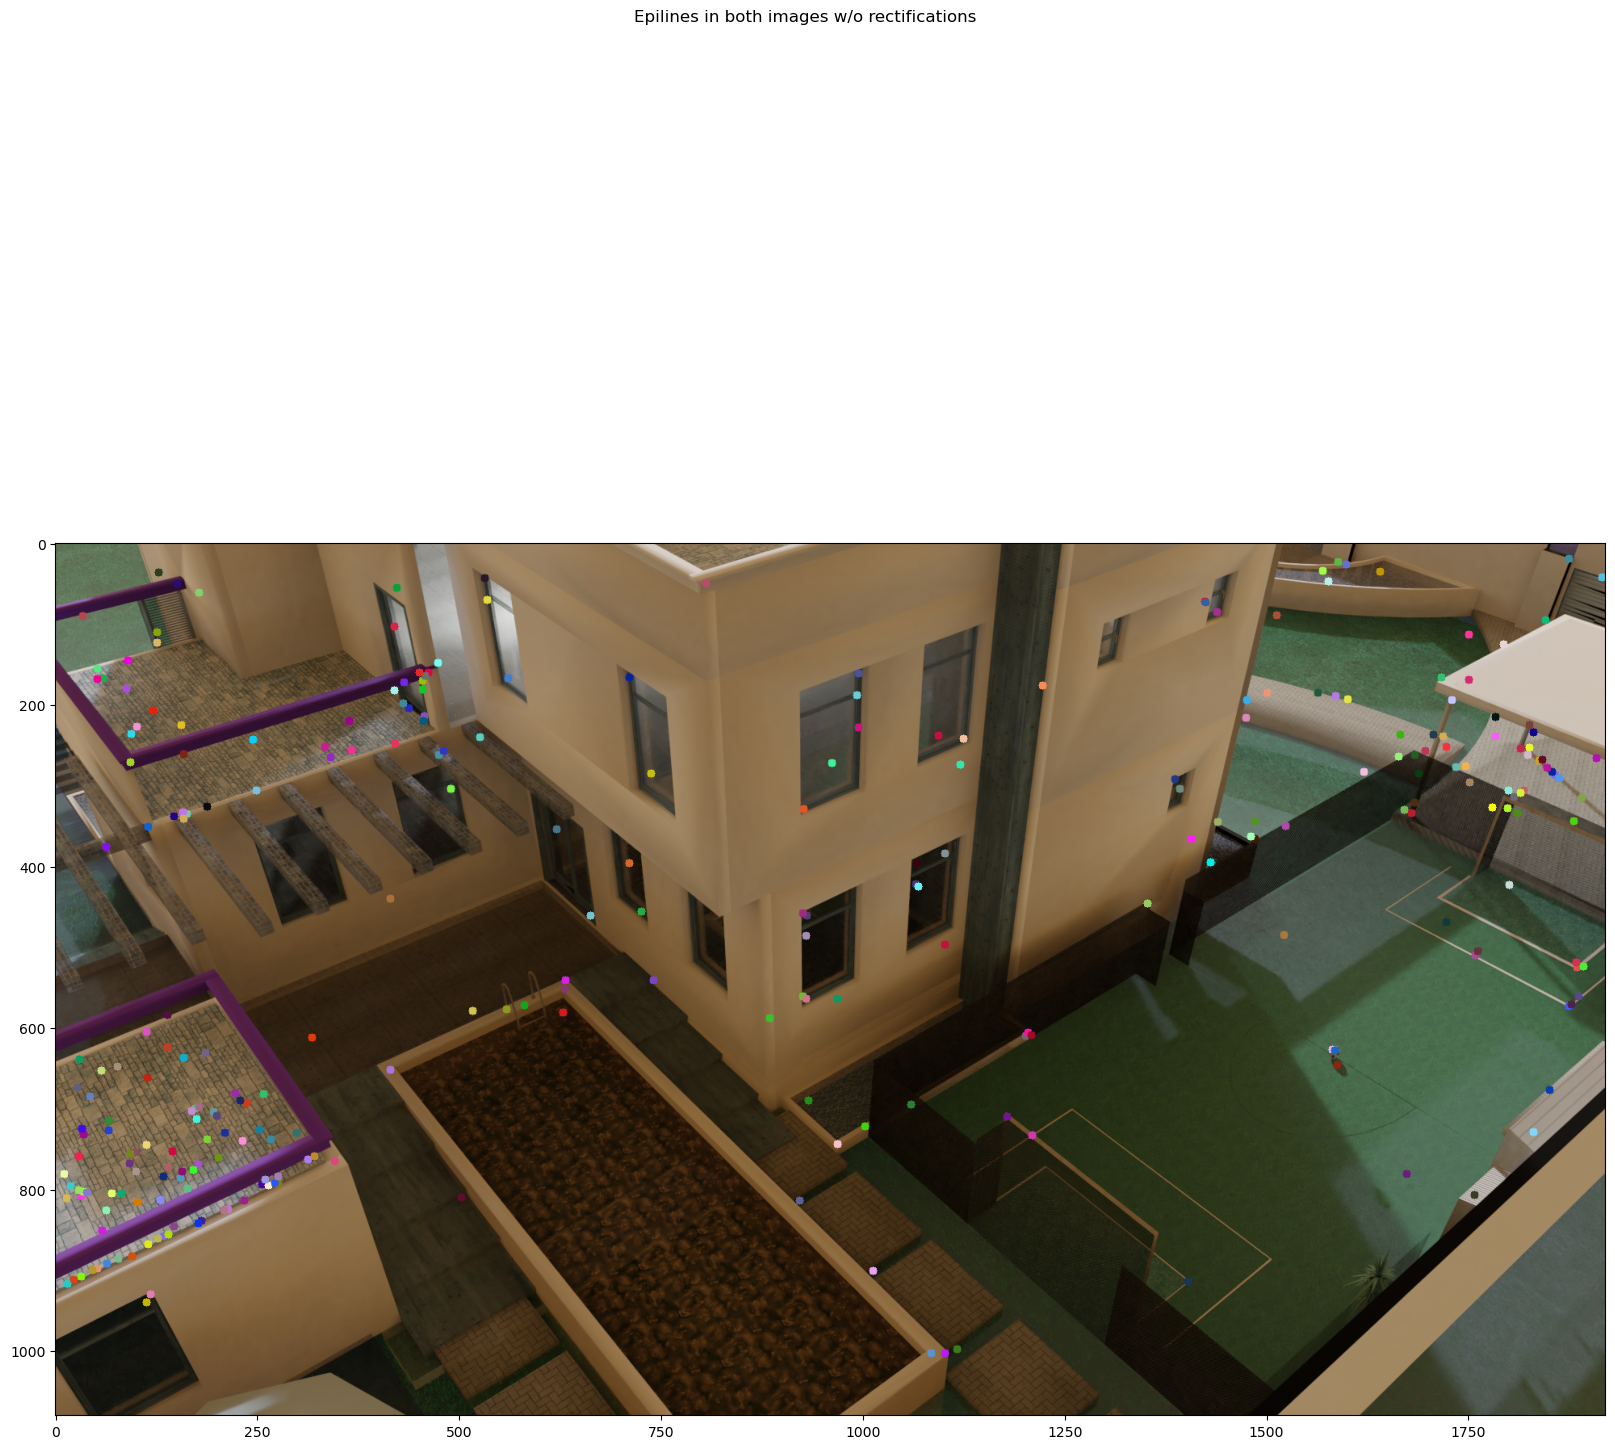

In [24]:
# Assuming we have `keypoints1`, `keypoints2`, and `good_matches` from the previous steps
# Also assuming we have computed the fundamental matrix `F`

# Step 1: Find the points from the keypoints
pts1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches])

# Step 2: Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image (first image)
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)



# Step 3: Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image (second image)
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, fundamental_matrix)
lines2 = lines2.reshape(-1, 3)



# Drawing the points
img3 = drawpoints(image1_detection, pts1,lines2)
img4 = drawpoints(image2_detection, pts2, lines1)

plt.figure(figsize = (20,20))
plt.imshow(img3)
plt.suptitle("Epilines in both images w/o rectifications")
plt.show()

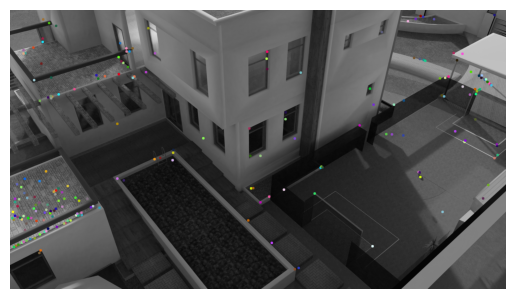

In [149]:
# Assuming we have `keypoints1`, `keypoints2`, and `good_matches` from the previous steps
# Also assuming we have computed the fundamental matrix `F`


# Step 2: Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image (first image)
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, fundamental_matrix)
lines1 = lines1.reshape(-1, 3)
img5, img6 = drawlines(image1_detection, image2_detection, lines1, pts1, pts2)



# Step 3: Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image (second image)
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, fundamental_matrix)
lines2 = lines2.reshape(-1, 3)
img3, img4 = drawlines(image2_detection, image1_detection, lines2, pts2, pts1)



#plt.figure(figsize = (20,20))
plt.imshow(img5)
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.show()

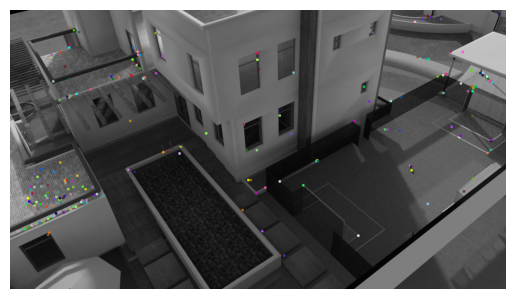

In [150]:
#plt.figure(figsize = (20,20))
plt.imshow(img3)
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.show()

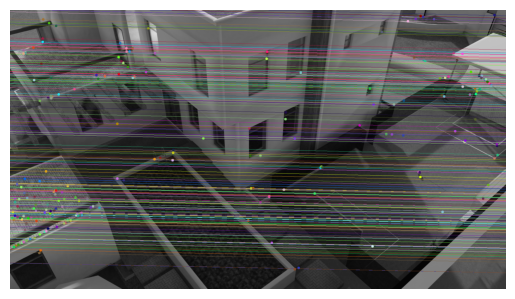

In [123]:


# Step 2: Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image (first image)
lines11 = cv2.computeCorrespondEpilines(pts2.reshape(-1, 1, 2), 2, normalized_fundamental)
lines11 = lines1.reshape(-1, 3)
img55, img66 = drawlines(image1_detection, image2_detection, lines11, pts1, pts2)



# Step 3: Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image (second image)
lines22 = cv2.computeCorrespondEpilines(pts1.reshape(-1, 1, 2), 1, normalized_fundamental)
lines22 = lines2.reshape(-1, 3)
img33, img44 = drawlines(image2_detection, image1_detection, lines22, pts2, pts1)



#plt.figure(figsize = (20,20))
plt.imshow(img55)
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.show()

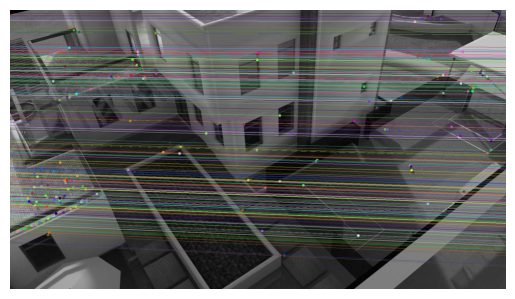

In [124]:
#plt.figure(figsize = (20,20))
plt.imshow(img33)
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.show()

### estimate pool and foot

In [386]:
image1_detection.shape

(1080, 1920)

In [464]:
h1, w1 = image1_detection.shape
h2, w2 = image2_detection.shape
_, H1, H2 = cv2.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), fundamental_matrix, imgSize=(w1, h1)
)


In [453]:
h1, w1 = image1_detection.shape
h2, w2 = image2_detection.shape
_, H1, H2 = cv2.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), normalized_fundamental, imgSize=(w1, h1)
)

In [356]:
h1, w1,_ = image1_detection.shape
h2, w2,_ = image2_detection.shape
_, H1, H2 = cv2.stereoRectifyUncalibrated(
    np.float32(pts1), np.float32(pts2), fundamental_matrix, imgSize=(w1, h1)
)

ValueError: not enough values to unpack (expected 3, got 2)

In [100]:
H1

array([[ 2.51813018e-02, -1.34379553e-03,  1.69898105e+00],
       [-6.14618458e-04,  2.48468180e-02,  1.00940217e+00],
       [-1.23423206e-07,  6.23948975e-08,  2.67398088e-02]])

In [101]:
H2

array([[ 1.04618355e+00,  2.79513750e-02, -5.94299543e+01],
       [-5.29032302e-04,  1.00034271e+00,  3.22805742e-01],
       [ 4.84794526e-05,  1.29524819e-06,  9.52760291e-01]])

In [465]:
img1_rectified = cv2.warpPerspective(image1_detection, H1, (w1, h1))
img2_rectified = cv2.warpPerspective(image2_detection, H2, (w2, h2))

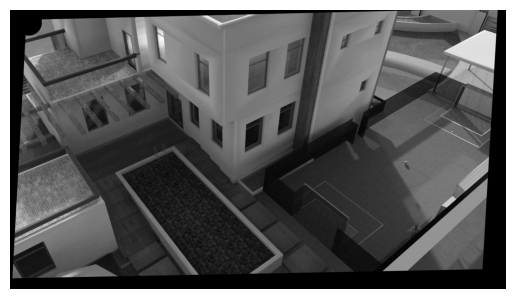

In [466]:
#plt.figure(figsize = (20,20))
plt.imshow(img1_rectified, cmap="gray")
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.show()

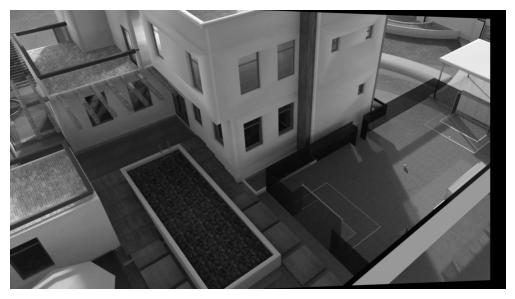

In [456]:
#plt.figure(figsize = (20,20))
plt.imshow(img2_rectified, cmap="gray")
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.show()

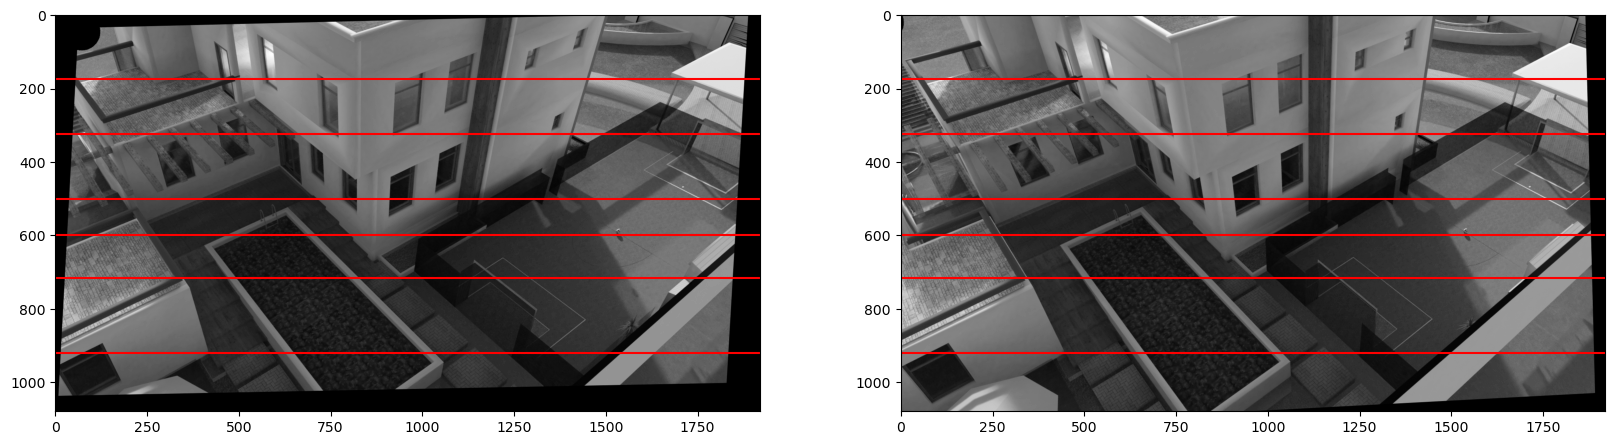

In [364]:
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(img1_rectified, cmap="gray")
axes[1].imshow(img2_rectified, cmap="gray")
axes[0].axhline(175, color='r')
axes[1].axhline(175, color='r')
axes[0].axhline(325, color='r')
axes[1].axhline(325, color='r')
axes[0].axhline(500, color='r')
axes[1].axhline(500, color='r')
axes[0].axhline(600, color='r')
axes[1].axhline(600, color='r')
axes[0].axhline(715, color='r')
axes[1].axhline(715, color='r')
axes[0].axhline(920, color='r')
axes[1].axhline(920, color='r')
#plt.suptitle("Rectified images")
plt.show()

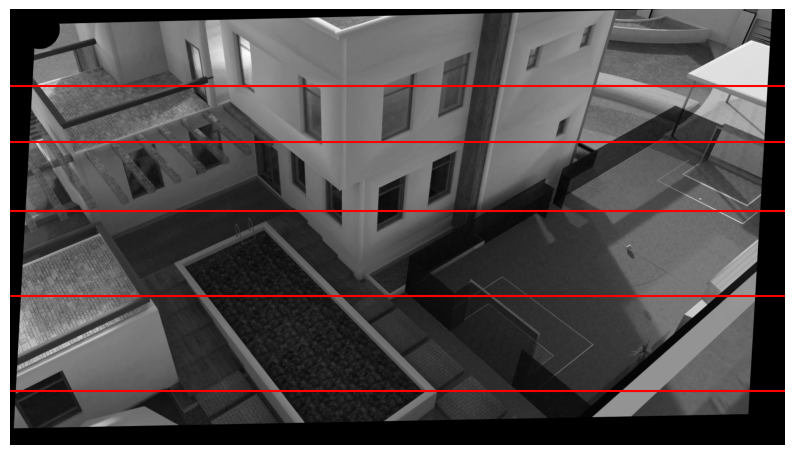

In [477]:
# Assuming img1_rectified is already defined and loaded

fig, ax = plt.subplots(figsize=(10, 10))  # Adjusted for a single plot
ax.imshow(img1_rectified, cmap="gray")    # Display the first rectified image

# Drawing horizontal lines
ax.axhline(190, color='r')
ax.axhline(330, color='r')
ax.axhline(500, color='r')
#ax.axhline(600, color='r')
ax.axhline(710, color='r')
ax.axhline(945, color='r')

plt.axis('off')
#plt.suptitle("Rectified Image 1") # Uncomment this if you want a title
plt.show()

In [408]:
# Matched block size. It must be an odd number >=1 . Normally, it should be somewhere in the 3..11 range.
block_size = 11
min_disp = -128
max_disp = 128
# Maximum disparity minus minimum disparity. The value is always greater than zero.
# In the current implementation, this parameter must be divisible by 16.
num_disp = max_disp - min_disp
# Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
# Normally, a value within the 5-15 range is good enough
uniquenessRatio = 7
# Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
# Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
speckleWindowSize = 200
# Maximum disparity variation within each connected component.
# If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
# Normally, 1 or 2 is good enough.
speckleRange = 2
disp12MaxDiff = 0

stereo = cv2.StereoSGBM_create(
    minDisparity=min_disp,
    numDisparities=num_disp,
    blockSize=block_size,
    uniquenessRatio=uniquenessRatio,
    speckleWindowSize=speckleWindowSize,
    speckleRange=speckleRange,
    disp12MaxDiff=disp12MaxDiff,
    P1=8 * 1 * block_size * block_size,
    P2=32 * 1 * block_size * block_size,
)

In [409]:
disparity_maptest1 = stereo.compute(img1_rectified, img2_rectified)

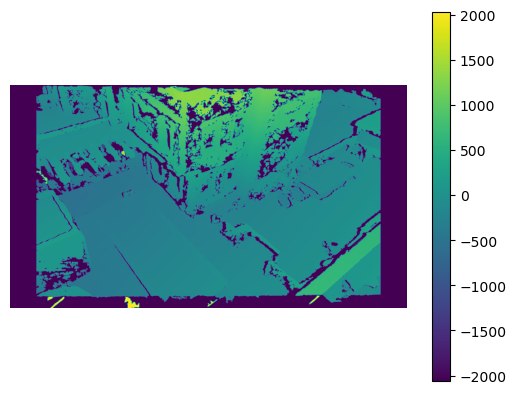

In [410]:
#plt.figure(figsize = (20,20))
plt.imshow(disparity_maptest1)
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.colorbar()
plt.show()

In [411]:
stereo_test_2 = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity_maptest2 = stereo_test_2.compute(img1_rectified, img2_rectified)


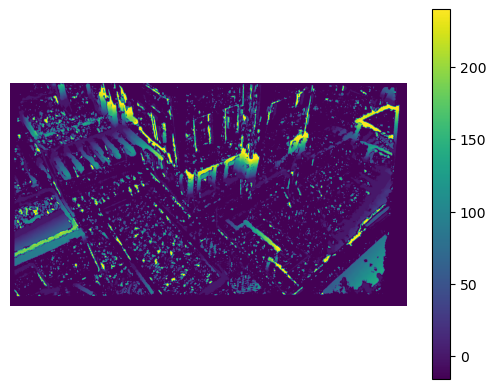

In [412]:
#plt.figure(figsize = (20,20))
plt.imshow(disparity_maptest2)
#plt.suptitle("Epilines in both images w/o rectifications")
plt.axis('off')
plt.colorbar()
plt.show()

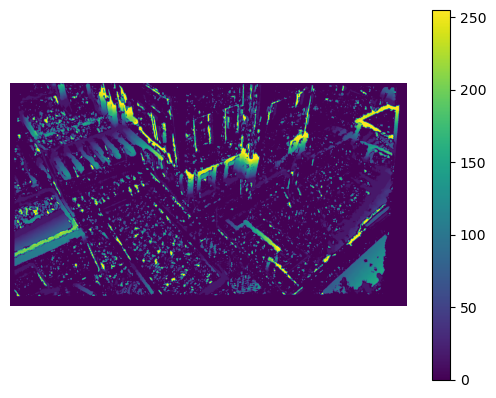

In [413]:

# Normalize the values to a range from 0..255 for a grayscale image
disparity_maptest2 = cv2.normalize(disparity_maptest2, disparity_maptest2, alpha=255,
                              beta=0, norm_type=cv2.NORM_MINMAX)
disparity_maptest2 = np.uint8(disparity_maptest2)
#cv.imshow("Disparity", disparity_SGBM)
"""
Problem with cv so I use plt
"""
plt.imshow(disparity_maptest2)
plt.axis('off')
plt.colorbar()
plt.show()

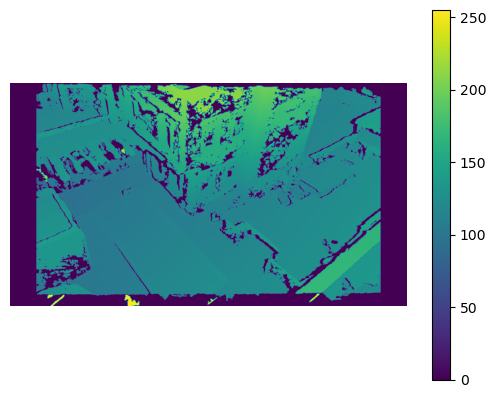

In [415]:

# Normalize the values to a range from 0..255 for a grayscale image
disparity_maptest1 = cv2.normalize(disparity_maptest1, disparity_maptest1, alpha=255,
                              beta=0, norm_type=cv2.NORM_MINMAX)
disparity_maptest1 = np.uint8(disparity_maptest1)
#cv.imshow("Disparity", disparity_SGBM)
"""
Problem with cv so I use plt
"""
plt.imshow(disparity_maptest1)
plt.axis('off')
plt.colorbar()
plt.show()

Depths: 26.89075630252101 29.62962962962963 31.372549019607842


/var/folders/mv/v4bk7n9n61lffwfysckj2g440000gn/T/ipykernel_96303/2964250616.py:4: RuntimeWarning: divide by zero encountered in divide
  depth = t*f/disparity_maptest1


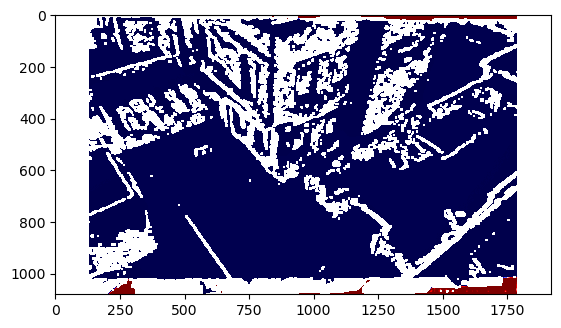

In [271]:
f = 1.600e+03
t = 2

depth = t*f/disparity_maptest1
plt.imshow(depth, cmap='seismic')
D = depth
inv_K = np.linalg.inv(K)

# for x in range(depth.shape[0]):
#     for y in range(depth.shape[1]):
#         if depth[x][y] > 10000:
#             depth[x][y] = 0
#         else:
#             pass

def gather_coordinates(matrix):
    
    coo = []    
    for i in range(len(matrix)):
        coo.append(matrix[i][i])
        
    return coo

# u = 420
# v = 653
# point_UL = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))

# u = 633
# v = 567
# point_UR = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))

# u = 1000
# v = 1000
# point_BR = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))
# print("Depths:", point_BR[2], point_UR[2], point_UL[2])

u = 625
v = 475
point_UL = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))

u = 580
v = 680
point_UR = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))

u = 950
v = 1050
point_BR = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))
print("Depths:", point_BR[2], point_UR[2], point_UL[2])

v = 1200
u = 800

point_BL_field = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))

v = 1785 
u = 400

point_UL_field = gather_coordinates(D[u][v] * inv_K * np.array([u, v, 1]))

(-0.5, 1919.5, 1079.5, -0.5)

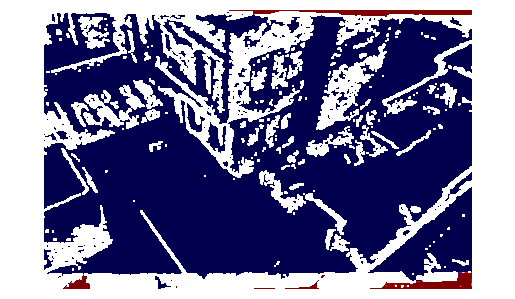

In [274]:
plt.imshow(depth, cmap='seismic', )
plt.axis('off')

In [272]:
sum_width = (point_UL[0]-point_UR[0])**2 + (point_UL[1]-point_UR[1])**2 + (point_UL[2]-point_UR[2])**2
width = np.sqrt(sum_width)

sum_length = (point_BR[0]-point_UR[0])**2 + (point_BR[1]-point_UR[1])**2 + (point_BR[2]-point_UR[2])**2
length = np.sqrt(sum_length)

area = width * length

print("This is the area of the swimming pool:\n", area)

This is the area of the swimming pool:
 31.15473004418273


In [111]:
point_UL_field

[6.299212598425196, 28.11023622047244, 25.19685039370079]

In [112]:
point_BL_field

[13.445378151260504, 20.168067226890756, 26.89075630252101]

In [239]:
sum_width = (point_UL_field[0]-point_BL_field[0])**2 + (point_UL_field[1]-point_BL_field[1])**2 + (point_UL_field[2]-point_BL_field[2])**2
width = np.sqrt(sum_width)
print('This is the length of the football yard: \n',width)

This is the length of the football yard: 
 10.81734938231526


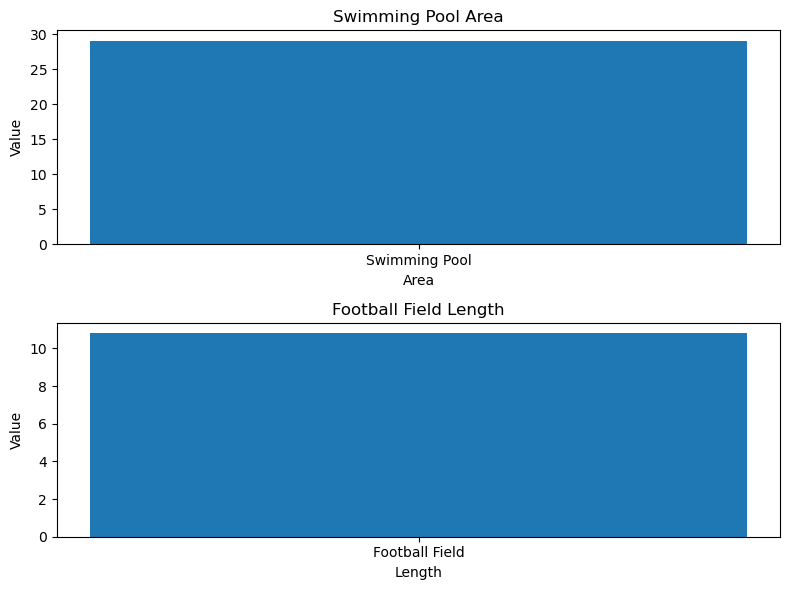

In [151]:
# ... (previous code)

# Calculate the swimming pool area and the football field length

# Plot the swimming pool area
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)  # Create a subplot for the swimming pool area
plt.title('Swimming Pool Area')
plt.xlabel('Area')
plt.ylabel('Value')
plt.bar(['Swimming Pool'], [area])

# Plot the football field length
plt.subplot(2, 1, 2)  # Create a subplot for the football field length
plt.title('Football Field Length')
plt.xlabel('Length')
plt.ylabel('Value')
plt.bar(['Football Field'], [width])

plt.tight_layout()  # Adjust subplot spacing for a clean layout
plt.show()  # Display the plots


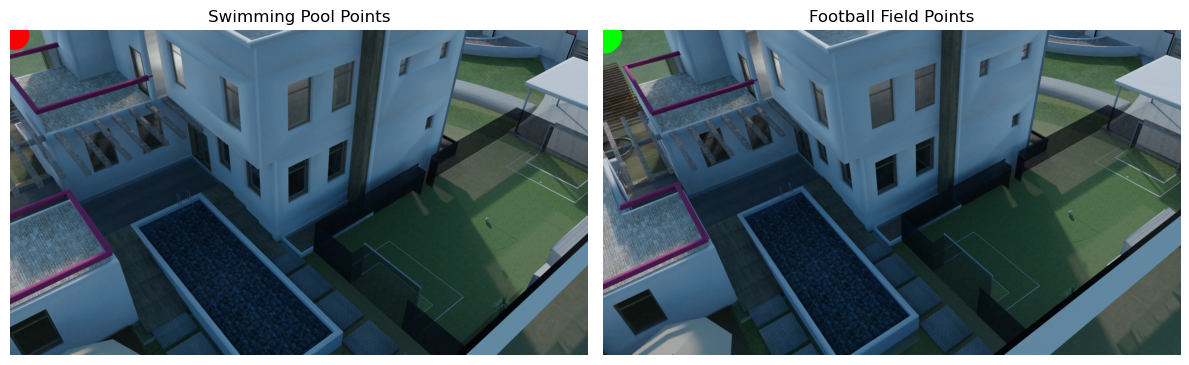

In [155]:
# Draw markers on the swimming pool points
color = (0, 0, 255)  # Red color for markers
thickness = 50  # Marker thickness

cv2.circle(frame1, (int(point_UL[0]), int(point_UL[1])), thickness, color, -1)
cv2.circle(frame1, (int(point_UR[0]), int(point_UR[1])), thickness, color, -1)
cv2.circle(frame1, (int(point_BR[0]), int(point_BR[1])), thickness, color, -1)

# Draw markers on the football field points
color = (0, 255, 0)  # Green color for markers

cv2.circle(frame2, (int(point_UL_field[0]), int(point_UL_field[1])), thickness, color, -1)
cv2.circle(frame2, (int(point_BL_field[0]), int(point_BL_field[1])), thickness, color, -1)

# Display the images with markers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
plt.title('Swimming Pool Points')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB))
plt.title('Football Field Points')
plt.axis('off')

plt.tight_layout()
plt.show()

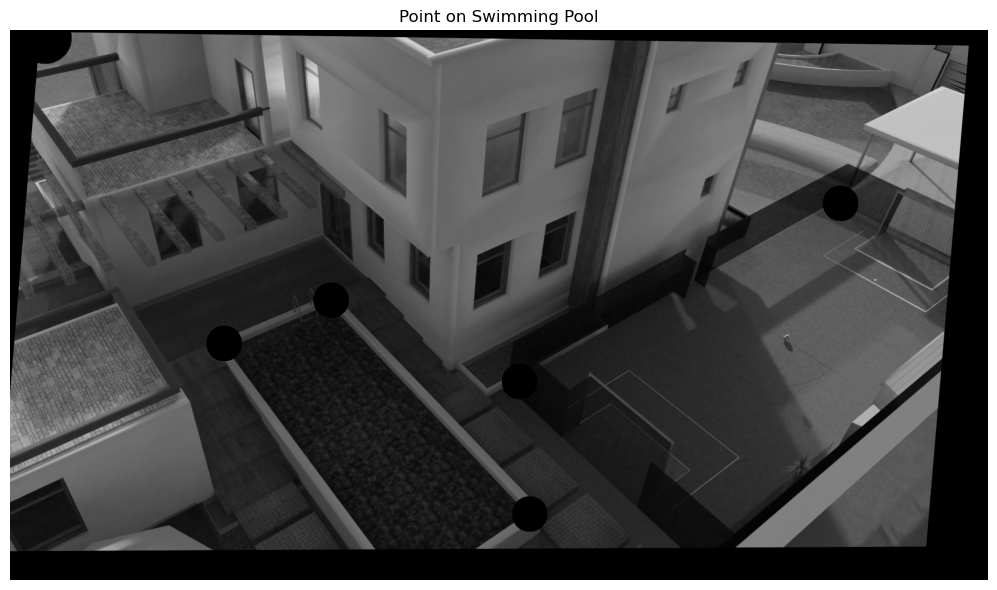

In [435]:
test = img1_rectified.copy()
frame1 = cv2.imread('Frame1.png')
frame2 = cv2.imread('Frame2.png')
# Define the coordinates (u, v) for the point you want to plot
u_swimming_pool1 = 630
v_swimming_pool1 = 530

u_swimming_pool2 = 420
v_swimming_pool2 = 615

u_swimming_pool3 = 1020
v_swimming_pool3 = 950

u_field1 = 1000 #800
v_field1 = 690 #1200

u_field2 = 1630
v_field2 = 340



# Draw markers on the original images at the specified points
color_swimming_pool = (0, 0, 255)  # Red color for swimming pool point
color_football_field = (0, 255, 0)  # Green color for football field point
thickness = 35  # Marker thickness

cv2.circle(test, (u_swimming_pool1, v_swimming_pool1), thickness, color_swimming_pool, -1)
#cv2.circle(frame2, (u_football_field, v_football_field), thickness, color_football_field, -1)
cv2.circle(test, (u_swimming_pool3, v_swimming_pool3), thickness, color_swimming_pool, -1)
cv2.circle(test, (u_swimming_pool2, v_swimming_pool2), thickness, color_swimming_pool, -1)
cv2.circle(test, (u_field2, v_field2), thickness, color_swimming_pool, -1)
cv2.circle(test, (u_field1, v_field1), thickness, color_swimming_pool, -1)



# Display the images with the plotted points
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.title('Point on Swimming Pool')
plt.axis('off')


plt.tight_layout()
plt.show()

Point 1: [12.10343716  8.23905148 31.387061  ]
Point 2: [10.04218824 11.89224085 30.20264361]
Point 3: [15.11794057 16.19792329 25.40857319]
Point 4: [12.36267836 17.86535564 28.58464484]
Point 5: [ 5.65534031 26.95456751 26.45851424]
Swimming Pool Area: 35.7525412664685 m²
Football Field Length: 11.49445899424777 m


/var/folders/mv/v4bk7n9n61lffwfysckj2g440000gn/T/ipykernel_96303/2562122211.py:65: RuntimeWarning: divide by zero encountered in divide
  depth = b*f/disparity_maptest1


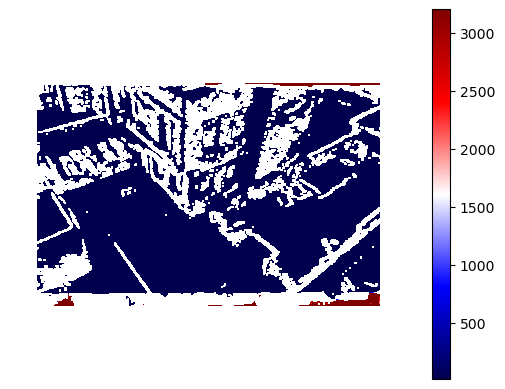

In [436]:
# Focal length
f = 1600  # Adjust this value based on your actual focal length

# Translation vector
t = np.array([-1.98989457, 0.00265269, 0.20979508])

# Compute the baseline
b = np.linalg.norm(t)

# Rectified coordinates (replace these with the actual rectified coordinates)
#rectified_points = np.array([[622, 421],
#                            [700, 975],
#                            [537, 630],
#                            [945, 1009],
#                            [334, 1625]])


rectified_points = np.array([[615, 420],
                            [530, 630],
                            [950, 1020],
                            [690, 1000],
                            
                            [340, 1630]])



def rectified_to_3d(rectified_points, disparity_map, f, t, b):
   points_3d = []

   for i in range(rectified_points.shape[0]):
      x, y = rectified_points[i]
      #disparity_p = disparity_SGBM[x, y]
      disparity_p = disparity_map[x, y]

      depth = (f * b) / disparity_p

      X = (x - t[0]) * depth / f
      Y = (y - t[1]) * depth / f
      Z = depth

      points_3d.append([X, Y, Z])

   return np.array(points_3d)

# Convert rectified coordinates to 3D coordinates
points_3d = rectified_to_3d(rectified_points, disparity_maptest1, f, t, b)

# Print the 3D coordinates
for i in range(points_3d.shape[0]):
   print(f"Point {i + 1}: {points_3d[i]}")



lenght = np.sqrt((points_3d[0][0] - points_3d[1][0]) ** 2 + (points_3d[0][1] - points_3d[1][1]) ** 2  + (points_3d[0][2] - points_3d[1][2]) ** 2)
weight = np.sqrt((points_3d[2][0] - points_3d[1][0]) ** 2 + (points_3d[2][1] - points_3d[1][1]) ** 2  + (points_3d[2][2] - points_3d[1][2]) ** 2)

swimming_pool_area = lenght * weight

# Compute the length of the football field
football_field_length = np.sqrt((points_3d[3][0] - points_3d[4][0]) ** 2 + (points_3d[3][1] - points_3d[4][1]) ** 2  + (points_3d[3][2] - points_3d[4][2]) ** 2)

print(f"Swimming Pool Area: {swimming_pool_area} m²")
print(f"Football Field Length: {football_field_length} m")

depth = b*f/disparity_maptest1
plt.imshow(depth, cmap='seismic')
plt.axis('off')
plt.colorbar()